In [2]:
from IPython.display import display, Math, Markdown
import numpy as np
import matplotlib.pyplot as plt

In [14]:
EPS = 1e-3

def f(x: float) -> float:
    return EPS*x**3 + x**2 - 3*x + 2

def df(x: float) -> float:
    return 3*EPS*x**2 + 2*x - 3

In [4]:
MAX_ITER = 10_000
TOLERANCE = EPS

## Newton

In [17]:
def newton(f, df, *, x_0: float, tol: float = TOLERANCE, max_iter: int = MAX_ITER) -> tuple[float, float] | None:
    x_old, x_new = float('inf'), x_0

    for _ in range(max_iter):
        if x_old - x_new < tol:
            return x_new
        x_old = x_new
        x_new = x_new - f(x_new) / df(x_new)

    return None

N_x0 = newton(f, df, x_0=1)
display(Math(f"$f(x) = 0$, where $x = {N_x0:.6f}$"))
N_x1 = newton(f, df, x_0=2)
display(Math(f"$f(x) = 0$, where $x = {N_x1:.6f}$"))
N_x2 = newton(f, df, x_0=-1e3)
display(Math(f"$f(x) = 0$, where $x = {N_x2:.6f}$"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Bisect


In [28]:
from math import copysign


def bisect(f, *, x_0: float, x_1: float, tol: float = TOLERANCE, max_iters: int = MAX_ITER) -> float | None:
    a, b = x_0, x_1

    for _ in range(max_iters):
        mid = (a + b) / 2
        res = f(mid)
        if abs(res) < tol:
            return mid
        
        if copysign(1, res) == copysign(1, f(a)):
            a = mid
        else:
            b = mid
    
    return None

B_x0 = bisect(f, x_0=0, x_1=1.5)
display(Math(f"$f(x) = 0$, where $x = {B_x0:.6f}$"))
B_x1 = bisect(f, x_0=1.5, x_1=2)
display(Math(f"$f(x) = 0$, where $x = {B_x1:.6f}$"))
B_x2 = bisect(f, x_0=-1005, x_1=-1000)
display(Math(f"$f(x) = 0$, where $x = {B_x2:.6f}$"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Analytic

In [27]:
A_x0 = 1 + EPS
display(Math(f"$f(x) = 0$, where $x = {A_x0:.6f}$"))
A_x1 = 2 - 8*EPS
display(Math(f"$f(x) = 0$, where $x = {A_x1:.6f}$"))
A_x2 = -1/EPS - 3
display(Math(f"$f(x) = 0$, where $x = {A_x2:.6f}$"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Plot

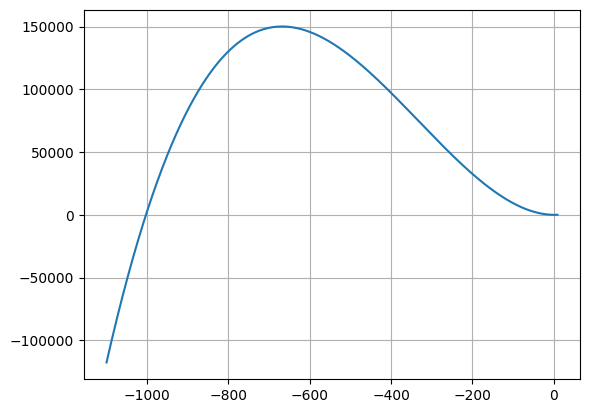

In [22]:
X = np.arange(-1100, 10, 1)
plt.plot(X, f(X))
plt.grid()

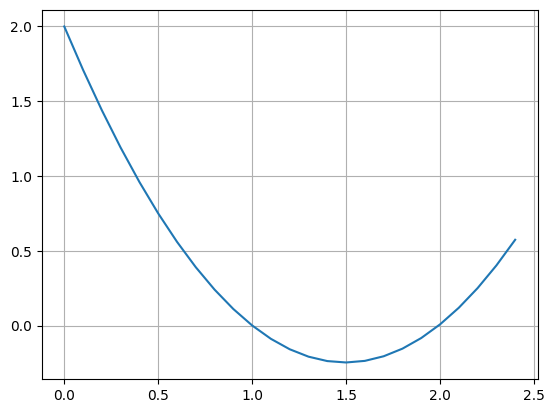

In [25]:
X = np.arange(0, 2.5, 0.1)
plt.plot(X, f(X))
plt.grid()